<h3>Data has been collected from the Zomato API in the form of .json files(raw data) using the url "https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20" and stored in CSV file "Zomato.csv".</h3>
<table><h4>The dataset contains data for following countries:-</h4>
    <b><tr><td>Country Code</td><td>Country</td></tr>
    <tr><td>1</td><td>India</td></tr>
    <tr><td>14</td><td>Australia</td></tr>
    <tr><td>30</td><td>Brazil</td></tr>
    <tr><td>37</td><td>Canada</td></tr>
    <tr><td>94</td><td>Indonesia</td></tr>
    <tr><td>148</td><td>New Zealand</td></tr>
    <tr><td>162</td><td>Phillipines</td></tr>
    <tr><td>166</td><td>Qatar</td></tr>
    <tr><td>184</td><td>Singapore</td></tr>
    <tr><td>189</td><td>South Africa</td></tr>
    <tr><td>191</td><td>Sri Lanka</td></tr>
    <tr><td>208</td><td>Turkey</td></tr>
    <tr><td>214</td><td>UAE</td></tr>
    <tr><td>216</td><td>United States</td></tr>
    <tr><td>215</td><td>United Kingdom</td></tr></b>
</table>

# Importing libraries and modules

In [1]:
import csv
import matplotlib.pyplot as plt
import requests 
import json
import operator

In [2]:
zomato_data = csv.DictReader(open('F:/datasets/zomato.csv',encoding='latin-1'),skipinitialspace=True)

# Finding number of restaurants present in Delhi NCR vs Rest of India.

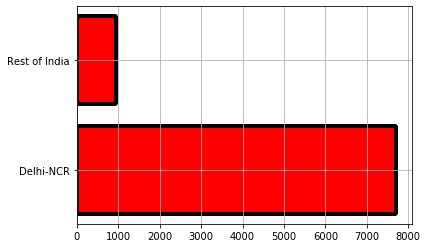

Number of restaurants in Delhi_Ncr is 7696 and in Rest of India is 956


In [3]:
file_data = zomato_data
Delhi_ncr = 0
Rest_India = 0
for row in file_data:
    #filter to select indian restaurants 
    if int(float(row['Country Code'])) == 1:
        #filter to select Delhi-NCR restaurants
        if (row['City'] == 'New Delhi')or(row['City'] == 'Ghaziabad')or(row['City'] == 'Noida')or(row['City'] == 'Gurgaon')or(row['City'] == 'Faridabad '):
            Delhi_ncr += 1
        else:
            Rest_India += 1
#For Bar-graph
num_restaurants = [Delhi_ncr, Rest_India]
locations = ['Delhi-NCR','Rest of India']
plt.barh(locations,num_restaurants,color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
plt.grid()
plt.show()
#result
print('Number of restaurants in Delhi_Ncr is', Delhi_ncr, 'and', 'in Rest of India is',Rest_India)

# Finding cuisines which are not present in restaurant of Delhi NCR but present in rest of India and verifying using Zomato API

In [4]:
file_data = csv.DictReader(open('F:/datasets/zomato.csv',encoding='latin-1'),skipinitialspace=True)
Delhi_cuisines = {}
rest_india_cuisines = {}
for row in file_data:
    if int(float(row['Country Code'])) == 1:
        val = row['Cuisines'].split(',')
        if (row['City'] == 'New Delhi')or(row['City'] == 'Ghaziabad')or(row['City'] == 'Noida')or(row['City'] == 'Gurgaon')or(row['City'] == 'Faridabad '):
            for j in val:
                value = j.strip()
                if value not in Delhi_cuisines:
                    Delhi_cuisines[value] = 0
        else:
            for j in val:
                value = j.strip()
                if value not in rest_india_cuisines:
                    rest_india_cuisines[value] = 0
#finding cuisines not present in delhi ncr
cuisines_not_in_delhincr = []
for i in rest_india_cuisines:
    if i not in Delhi_cuisines:
        cuisines_not_in_delhincr.append(i)
#result
print('Cuisines that are not served in Delhi NCR region according to dataset')
for i in cuisines_not_in_delhincr:
    print(i)

#CHECKING THE RESULTS WITH ZOMATO API
user_key = '9c3e554ee58c67e7bed6a5180c0a9513' # fill generated_api_key
basic_api = 'https://developers.zomato.com/api/v2.1'
h = {'User-agent':"curl/7.43.0",'Accept':'application/json','user-key':user_key}
p = {'city_id':1}
#fetching the cuisines in Delhi NCR
response = requests.get(basic_api+'/cuisines',headers=h,params=p)
data = response.json()['cuisines']
print('-----------------------------------------------------------------------')
cuisines_not_in_dataset = []    
print('Results from ZOMATO API-the cuisines are present in DELHI NCR but not in the zomato.csv')
for i in data:
    val = i['cuisine']['cuisine_name']
    #checking which are not present in zomato.csv dataset
    if val not in Delhi_cuisines:    
        cuisine_id = i['cuisine']['cuisine_id']
        p2 ={'cuisines':cuisine_id,'q':'Delhi'}
        response2 = requests.get(basic_api+'/search',headers=h,params=p2)
        data2 = response2.json()['restaurants']
        if len(data2) == 0:
            pass
        else:
            cuisines_not_in_dataset.append(val)
            data2 = data2[0]['restaurant']['name']
            print(val,':Served in ',data2)
#final result 
print('-------------------------------------------------------------------------')
print('These are the actual cuisines are actually not served in Delhi NCR (according to Zomato API) and served in rest of india')
for i in rest_india_cuisines:
    if i not in cuisines_not_in_dataset and i not in Delhi_cuisines:
        print(i)

Cuisines that are not served in Delhi NCR region according to dataset
German
Malwani
BBQ
Cajun
-----------------------------------------------------------------------
Results from ZOMATO API-the cuisines are present in DELHI NCR but not in the zomato.csv
Afghan :Served in  Kabul Delhi
BBQ :Served in  Delhi Barbeque
Bar Food :Served in  Pling - Pullman New Delhi Aerocity
Brazilian :Served in  Fat Cat Bistro
Bubble Tea :Served in  Burma Burma
Cantonese :Served in  The Hong Kong Club - Andaz Delhi
Charcoal Chicken :Served in  Honey Corner
Coffee :Served in  Cafe Delhi Heights
Ethiopian :Served in  Ethiopian Cultural Centre
Frozen Yogurt :Served in  Cocoberry
Hot dogs :Served in  Vijay Hot Dog
Israeli :Served in  The Food Factory
Kebab :Served in  Delhi Pub Exchange By SMAAASH
Malwani :Served in  Backwater Bistro
Mishti :Served in  Bikaner Sweet Corner
Momos :Served in  K3 - JW Marriott New Delhi
Odia :Served in  Lokenath Hotel & Lodge
Paan :Served in  Xxtra Chutney By Prince Paan
Poké :Se

# Finding top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Delhi NCR top 10 cuisines
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Italian
Street Food
-----------------------------------------------------------------------------
Rest of India top 10 cuisines
North Indian
Chinese
Continental
Fast Food
Italian
Cafe
Mughlai
South Indian
Desserts
Bakery


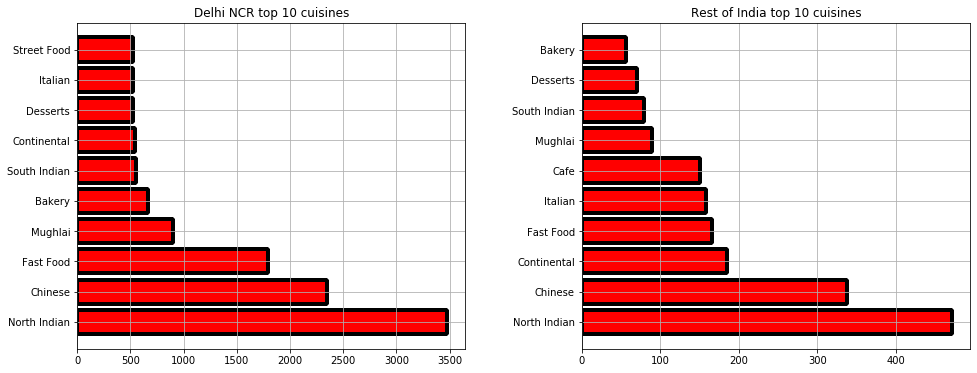

In [5]:
file_data = csv.DictReader(open('F:/datasets/zomato.csv',encoding='latin-1'),skipinitialspace=True)
Delhi_cuisines = {}
rest_india_cuisines = {}
for row in file_data:
    if int(float(row['Country Code'])) == 1:
        val = row['Cuisines'].split(',')
        if (row['City'] == 'New Delhi')or(row['City'] == 'Ghaziabad')or(row['City'] == 'Noida')or(row['City'] == 'Gurgaon')or(row['City'] == 'Faridabad '):
            for j in val:
                value = j.strip()
                Delhi_cuisines[value] = Delhi_cuisines.get(value,0) + 1
        else:
            for j in val:
                value = j.strip()
                rest_india_cuisines[value] = rest_india_cuisines.get(value,0) + 1
#top 10 cuisines - dictionary is sorted by values 
top10_delhi_cuisines = sorted(Delhi_cuisines.items(), key=operator.itemgetter(1),reverse=True)[0:10]
top10_rest_India_cuisines = sorted(rest_india_cuisines.items(), key=operator.itemgetter(1),reverse=True)[0:10]
delhi_top10_x = []
delhi_top10_y = []
restIndia_top10_x = []
restIndia_top10_y = []
for i in top10_delhi_cuisines:
    delhi_top10_x.append(i[0])
    delhi_top10_y.append(i[1])
for i in top10_rest_India_cuisines:
    restIndia_top10_x.append(i[0])
    restIndia_top10_y.append(i[1])
    
print('Delhi NCR top 10 cuisines')
for i in delhi_top10_x:
    print(i)   
print('-----------------------------------------------------------------------------')
print('Rest of India top 10 cuisines')
for i in restIndia_top10_x:
    print(i)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
# Create the bargraph on the first position with the given configurations
bar_1 = axes[0].barh(delhi_top10_x,delhi_top10_y,color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
# Define this plot title
axes[0].set_title('Delhi NCR top 10 cuisines')
# Create the bar graph on the second position with the given configurations
bar_2 = axes[1].barh(restIndia_top10_x,restIndia_top10_y,color='red', edgecolor='black',linewidth=4,joinstyle='bevel')
# Define this plot title
axes[1].set_title('Rest of India top 10 cuisines')
# Adjust the space between the two bar graphs
axes[0].grid()
axes[1].grid()
plt.subplots_adjust(wspace=.3)
plt.show()

# Analysis of how cuisine served is different from Delhi NCR to Rest of India.

Delhi NCR offers variety of cuisines(food) as compared to rest of India
Especially fast food and street food is very famous in Delhi NCR as comapared to rest of India
Pie chart to show above fact.


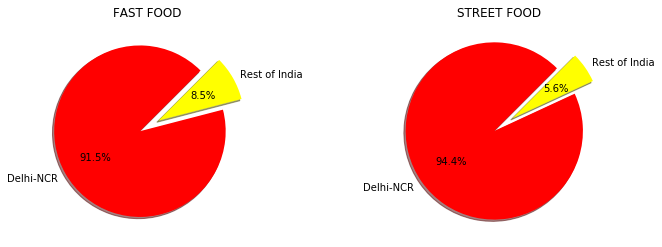

In [6]:
print('Delhi NCR offers variety of cuisines(food) as compared to rest of India')
print('Especially fast food and street food is very famous in Delhi NCR as comapared to rest of India')
print('Pie chart to show above fact.')
#For pie chart 
locations = ['Delhi-NCR','Rest of India']
fast_food = [Delhi_cuisines['Fast Food'],rest_india_cuisines['Fast Food']]
street_food = [Delhi_cuisines['Street Food'],rest_india_cuisines['Street Food']]
color = ['red','yellow']
e=[0,0.25]
# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# Create the pie chart on the first position with the given configurations
pie_1 = axes[0].pie(fast_food,colors=color,labels=locations,explode=e,shadow=True,startangle=45,autopct='%1.1f%%')
axes[0].set_title('FAST FOOD')
# Make both axes equal, so that the chart is round
axes[0].axis('equal')
# Create the pie chart on the second position with the given configurations
pie_2 = axes[1].pie(street_food,colors=color,labels=locations,explode=e,shadow=True,startangle=45,autopct='%1.1f%%')
axes[1].set_title('STREET FOOD')
plt.axis('equal')
# Adjust the space between the two pie charts
plt.subplots_adjust(wspace=0.7)
plt.show()

# Analysis to find the influence of number of votes on user rating

X-axis represent the No. of votes (interval)recieved by the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of no.of votes i.e number of restaurants recieved that no. of votes(interval)


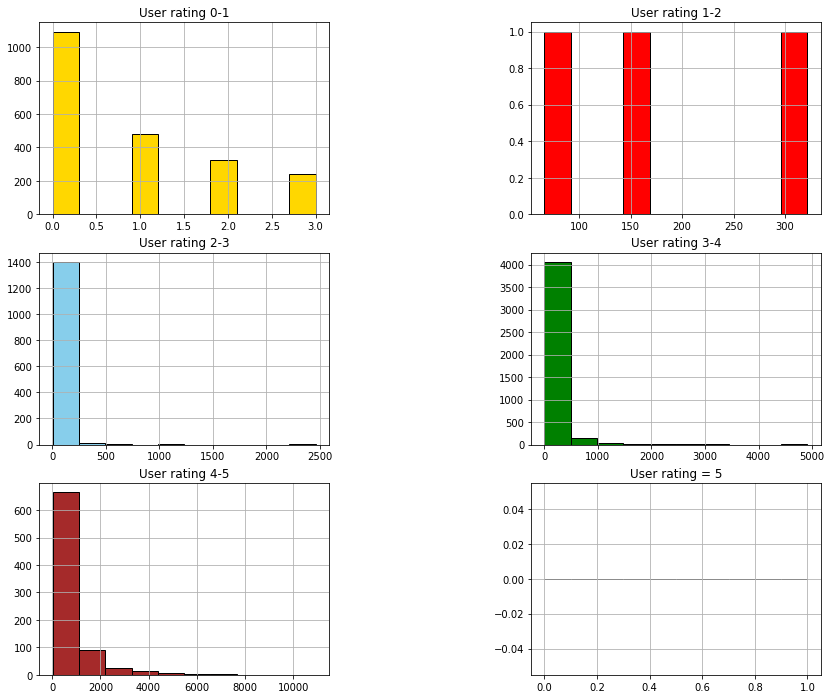

Detailed Analysis of user-rating and no. of votes shows that user rating is directly proportional to no. of votes


In [7]:
votes = []
user_rating = []
with open('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        if int(float(row['Country Code'])) == 1:
            votes.append(row['Votes'])
            user_rating.append(row['Aggregate rating'])
rating_0to1 = []
rating_1to2 = []
rating_2to3 = []
rating_3to4 = []
rating_4to5 = []
rating_5 = []
for i in range(0,len(user_rating)):
    user_rating[i] = float(user_rating[i])
    votes[i] = int(float(votes[i]))
    if user_rating[i] < 1:
        rating_0to1.append(votes[i])
    elif user_rating[i] >= 1 and user_rating[i] < 2:
        rating_1to2.append(votes[i])
    elif user_rating[i] >= 2 and user_rating[i] < 3:
        rating_2to3.append(votes[i])
    elif user_rating[i] >= 3 and user_rating[i] < 4:
        rating_3to4.append(votes[i])
    elif user_rating[i] >= 4 and user_rating[i] < 5:
        rating_4to5.append(votes[i])
    else:
        rating_5.append(votes[i])
#x-axis and y-axis labels
print('X-axis represent the No. of votes (interval)recieved by the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of no.of votes i.e number of restaurants recieved that no. of votes(interval)')        
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(rating_0to1,color='gold',edgecolor='black')
axes[0][0].set_title('User rating 0-1')
axes[0][0].grid()
hist2 = axes[0][1].hist(rating_1to2,color='red',edgecolor='black')
axes[0][1].set_title('User rating 1-2')
axes[0][1].grid()
hist3 = axes[1][0].hist(rating_2to3,color='skyblue',edgecolor='black')
axes[1][0].set_title('User rating 2-3')
axes[1][0].grid()
hist4 = axes[1][1].hist(rating_3to4,color='green',edgecolor='black')
axes[1][1].set_title('User rating 3-4')
axes[1][1].grid()
hist5 = axes[2][0].hist(rating_4to5,color='brown',edgecolor='black')
axes[2][0].set_title('User rating 4-5')
axes[2][0].grid()
hist6 = axes[2][1].hist(rating_5,edgecolor='black')
axes[2][1].set_title('User rating = 5')
axes[2][1].grid()
plt.subplots_adjust(wspace=0.7)
plt.show()
#result
print('Detailed Analysis of user-rating and no. of votes shows that user rating is directly proportional to no. of votes')


# Analysis To find the effect of the Restaurant serving more number of cuisines on the user rating

X-axis represent the No. of cuisines served by the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of no.of cuisines i.e number of restaurants serving that no. of cuisines


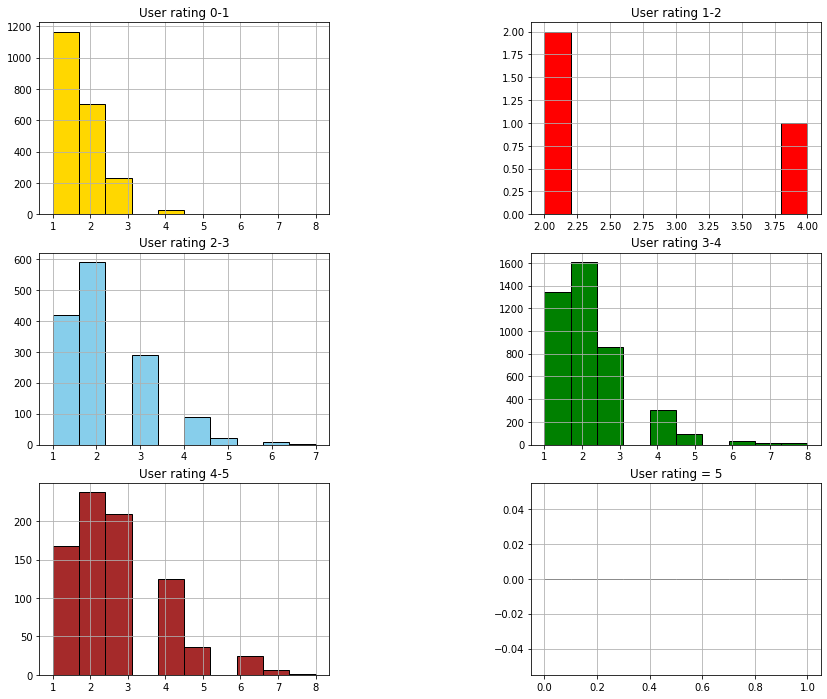

Detailed analysis shows that number of cuisines served by restaurant have little influence on the Aggregate rating of the restaurant


In [8]:
no_of_cuisines = []
user_rating = []
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        if int(float(row['Country Code'])) == 1:
            no_of_cuisines.append(len(row['Cuisines'].split(',')))
            user_rating.append(row['Aggregate rating'])
rating_0to1[:] = []
rating_1to2[:] = []
rating_2to3[:] = []
rating_3to4[:] = []
rating_4to5[:] = []
rating_5[:] = []
for i in range(0,len(user_rating)):
    user_rating[i] = float(user_rating[i])
    if user_rating[i] < 1:
        rating_0to1.append(no_of_cuisines[i])
    elif user_rating[i] >= 1 and user_rating[i] < 2:
        rating_1to2.append(no_of_cuisines[i])
    elif user_rating[i] >= 2 and user_rating[i] < 3:
        rating_2to3.append(no_of_cuisines[i])
    elif user_rating[i] >= 3 and user_rating[i] < 4:
        rating_3to4.append(no_of_cuisines[i])
    elif user_rating[i] >= 4 and user_rating[i] < 5:
        rating_4to5.append(no_of_cuisines[i])
    else:
        rating_5.append(no_of_cuisines[i])
#x-axis and y-axis labels
print('X-axis represent the No. of cuisines served by the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of no.of cuisines i.e number of restaurants serving that no. of cuisines')
#histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(rating_0to1,color='gold',edgecolor='black')
axes[0][0].grid()
axes[0][0].set_title('User rating 0-1')
hist2 = axes[0][1].hist(rating_1to2,color='red',edgecolor='black')
axes[0][1].set_title('User rating 1-2')
axes[0][1].grid()
hist3 = axes[1][0].hist(rating_2to3,color='skyblue',edgecolor='black')
axes[1][0].set_title('User rating 2-3')
axes[1][0].grid()
hist4 = axes[1][1].hist(rating_3to4,color='green',edgecolor='black')
axes[1][1].set_title('User rating 3-4')
axes[1][1].grid()
hist5 = axes[2][0].hist(rating_4to5,color='brown',edgecolor='black')
axes[2][0].set_title('User rating 4-5')
axes[2][0].grid()
hist6 = axes[2][1].hist(rating_5,edgecolor='black')
axes[2][1].set_title('User rating = 5')
axes[2][1].grid()
plt.subplots_adjust(wspace=0.7)
plt.show()
#result
print('Detailed analysis shows that number of cuisines served by restaurant have little influence on the Aggregate rating of the restaurant')


# Anaysis To find the influence of Average cost for two of the restaurant on the User rating of restaurant

X-axis represent the Average Cost for two of the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of Average Cost for two i.e number of restaurants having that Average Cost for two


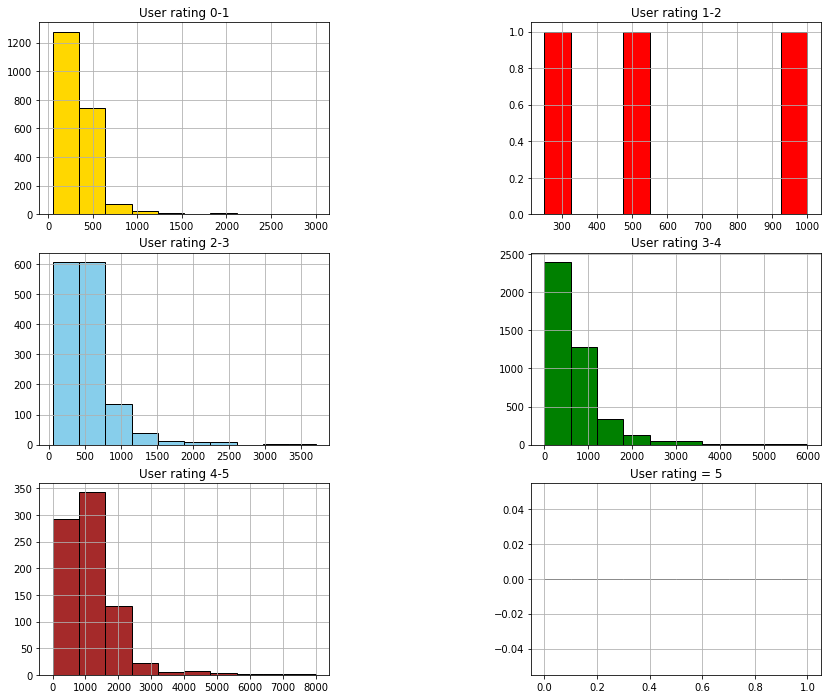

Detailed analysis shows that Average cost for two is 1000 to 2000 (can be above 2000 as well)of highly-rated restaurants
Average cost for two 500 to 1500 for medium-rated restaurants and below 1000 for low-rated restaurants


In [9]:
average_cost = []
user_rating = []
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        if int(float(row['Country Code'])) == 1:
            average_cost.append(int(float(row['Average Cost for two'])))
            user_rating.append(row['Aggregate rating'])
rating_0to1[:] = []
rating_1to2[:] = []
rating_2to3[:] = []
rating_3to4[:] = []
rating_4to5[:] = []
rating_5[:] = []
for i in range(0,len(user_rating)):
    user_rating[i] = float(user_rating[i])
    if user_rating[i] < 1:
        rating_0to1.append(average_cost[i])
    elif user_rating[i] >= 1 and user_rating[i] < 2:
        rating_1to2.append(average_cost[i])
    elif user_rating[i] >= 2 and user_rating[i] < 3:
        rating_2to3.append(average_cost[i])
    elif user_rating[i] >= 3 and user_rating[i] < 4:
        rating_3to4.append(average_cost[i])
    elif user_rating[i] >= 4 and user_rating[i] < 5:
        rating_4to5.append(average_cost[i])
    else:
        rating_5.append(average_cost[i])
#x-axis and y-axis labels
print('X-axis represent the Average Cost for two of the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of Average Cost for two i.e number of restaurants having that Average Cost for two')
#histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(rating_0to1,color='gold',edgecolor='black')
axes[0][0].set_title('User rating 0-1')
axes[0][0].grid()
hist2 = axes[0][1].hist(rating_1to2,color='red',edgecolor='black')
axes[0][1].set_title('User rating 1-2')
axes[0][1].grid()
hist3 = axes[1][0].hist(rating_2to3,color='skyblue',edgecolor='black')
axes[1][0].set_title('User rating 2-3')
axes[1][0].grid()
hist4 = axes[1][1].hist(rating_3to4,color='green',edgecolor='black')
axes[1][1].set_title('User rating 3-4')
axes[1][1].grid()
hist5 = axes[2][0].hist(rating_4to5,color='brown',edgecolor='black')
axes[2][0].set_title('User rating 4-5')
axes[2][0].grid()
hist6 = axes[2][1].hist(rating_5,edgecolor='black')
axes[2][1].set_title('User rating = 5')
axes[2][1].grid()
plt.subplots_adjust(wspace=0.7)
plt.show()
#result
print('Detailed analysis shows that Average cost for two is 1000 to 2000 (can be above 2000 as well)of highly-rated restaurants')
print('Average cost for two 500 to 1500 for medium-rated restaurants and below 1000 for low-rated restaurants')  

# Analysis To Find the weighted restaurant rating of each locality. 
# Also find out the top 10 localities with more weighted restaurant rating

In [10]:
#For each locality Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .
#dict to maintain the localities
localities = {}
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        if int(float(row['Country Code'])) == 1:
            if row['Locality'] not in localities:
                localities[row['Locality']] = [[int(float(row['Votes'])),float(row['Aggregate rating'])]]
            else:
                localities[row['Locality']].append([int(float(row['Votes'])),float(row['Aggregate rating'])])            

for i in localities:
    total_votes = 0
    votes_and_rating = 0
    for j in localities[i]:
        #calculating total weighted restaurant rating for each locality
        votes_and_rating += float(j[0])*j[1]
        total_votes += j[0]
    if total_votes != 0:
        localities[i] = float(format(votes_and_rating/total_votes,".2f"))
    else:
        localities[i] = 0
#result top 10 locality
print('TOP 10 LOCALITIES')
for i in sorted(localities.items(), key=operator.itemgetter(1),reverse=True)[0:10]:
    print(i[0],i[1])

TOP 10 LOCALITIES
Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


# Finding top 15 restaurants have a maximum number of outlets.

Top 15 restaurants have a maximum number of outlets:-
Cafe Coffee Day has 83 outlets
Domino's Pizza has 79 outlets
Subway has 63 outlets
Green Chick Chop has 51 outlets
McDonald's has 48 outlets
Keventers has 34 outlets
Pizza Hut has 30 outlets
Giani has 29 outlets
Baskin Robbins has 28 outlets
Barbeque Nation has 26 outlets
Dunkin' Donuts has 22 outlets
Giani's has 22 outlets
Barista has 22 outlets
Pind Balluchi has 20 outlets
Costa Coffee has 20 outlets


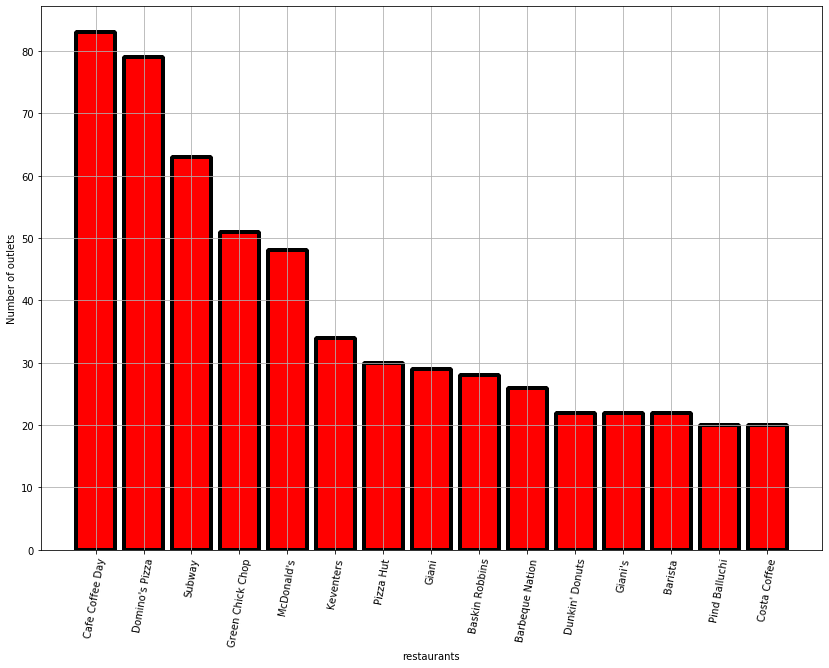

In [11]:
# Finding top 15 restaurants have a maximum number of outlets.
restaurants_and_outlets = {}
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        name = row['Restaurant Name']
        restaurants_and_outlets[name] = restaurants_and_outlets.get(name,0) + 1
rest = []
outlets =[]
print("Top 15 restaurants have a maximum number of outlets:-")
for i in sorted(restaurants_and_outlets.items(), key=operator.itemgetter(1),reverse=True)[0:15]:
    print(i[0],"has",i[1],"outlets")
    rest.append(i[0])
    outlets.append(i[1])
plt.figure(figsize=(14,10))
plt.bar(rest,outlets,color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
plt.xticks(rotation= 80)
plt.xlabel('restaurants')
plt.ylabel('Number of outlets')
plt.grid()
plt.show()

# Finding aggregate rating of restaurant(dropping the unrated restaurant).

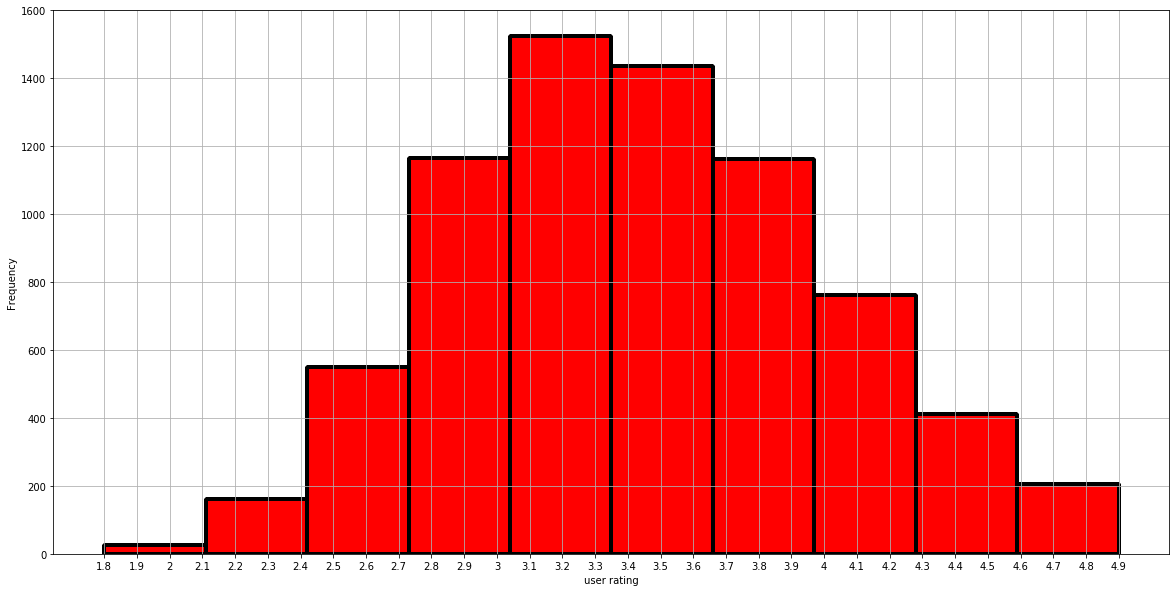

In [12]:
aggregate_rating = []
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        a = row['Aggregate rating']
        if a != '0':
            aggregate_rating.append(a)
aggregate_rating.sort()
plt.figure(figsize=(20,10))
plt.hist(aggregate_rating,color= 'red',histtype="barstacked",edgecolor="black",linewidth=4,joinstyle="bevel")
plt.xlabel('user rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Finding top 10 restaurants in the data with the highest number of votes.

Top 10 restaurants with highest number of votes
Toit : 10934 votes
Truffles : 9667 votes
Hauz Khas Social : 7931 votes
Peter Cat : 7574 votes
AB's - Absolute Barbecues : 6907 votes
Barbeque Nation : 5966 votes
Big Brewsky : 5705 votes
The Black Pearl : 5385 votes
BarBQ : 5288 votes
Saravana Bhavan : 5172 votes


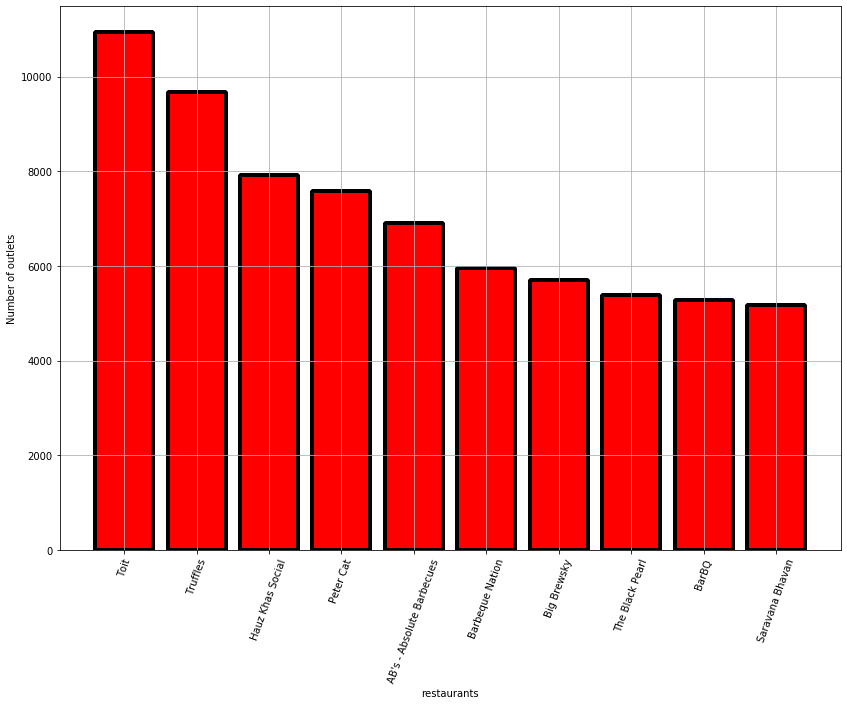

In [13]:
restaurant_and_votes = {}
with open ('F:/datasets/zomato.csv',encoding='latin-1') as f:
    file_data = csv.DictReader(f,skipinitialspace=True)
    for row in file_data:
        restaurant_and_votes[row['Restaurant Name']] = max(int(row['Votes']), restaurant_and_votes.get(row['Restaurant Name'],0))
print("Top 10 restaurants with highest number of votes")
rest = []
votes = []
for i in sorted(restaurant_and_votes.items(), key=operator.itemgetter(1),reverse=True)[0:10]:
    print(i[0],":",i[1],"votes")
    rest.append(i[0])
    votes.append(i[1])
plt.figure(figsize=(14,10))
plt.bar(rest,votes,color='red',edgecolor='black',linewidth=4,joinstyle='bevel')
plt.xticks(rotation= 70)
plt.xlabel('restaurants')
plt.ylabel('Number of outlets')
plt.grid()
plt.show()

# Finding top 10 cuisines present in restaurants in the USA.

Top 10 cuisines present in restaurants in the USA:-
Chinese served in 2353 restaurants
Fast Food served in 1798 restaurants
Desserts served in 528 restaurants
Italian served in 525 restaurants
Cafe served in 477 restaurants
Pizza served in 278 restaurants
Ice Cream served in 204 restaurants
Beverages served in 197 restaurants
American served in 190 restaurants
Thai served in 175 restaurants


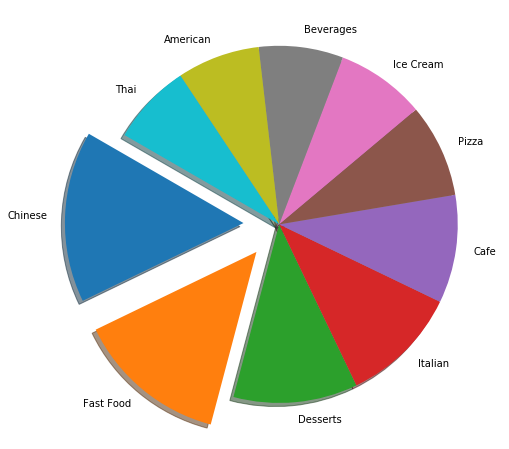

In [14]:
file_data = csv.DictReader(open('F:/datasets/zomato.csv',encoding='latin-1'),skipinitialspace=True)
usa_cuisines = {}
for row in file_data:
    if int(float(row['Country Code'])) == 216:
        val = row['Cuisines'].split(',')
        for j in val:
            value = j.strip()
            usa_cuisines[value] = Delhi_cuisines.get(value,0) + 1
#top 10 cuisines - dictionary is sorted by values 
cuisines = []
times = []
print("Top 10 cuisines present in restaurants in the USA:-")
for i in sorted(usa_cuisines.items(), key=operator.itemgetter(1),reverse=True)[0:10]:
    print(i[0],"served in",i[1],"restaurants")
    cuisines.append(i[0])
    times.append(i[1])
plt.figure(figsize=(8,8))
plt.axis("equal")
plt.pie(votes,labels = cuisines,startangle = 150,shadow=True, explode = (0.2,0.2,0,0,0,0,0,0,0,0))
plt.show()

# Plotting bubble graph of a number of Restaurants present in the cities of India (keeping weighted restaurant rating of the city in a bubble)

Agra has 19 restaurants with weighted rating 4.01
Ahmedabad has 20 restaurants with weighted rating 4.16
Allahabad has 19 restaurants with weighted rating 3.41
Amritsar has 20 restaurants with weighted rating 3.8
Aurangabad has 19 restaurants with weighted rating 3.39
Bangalore has 19 restaurants with weighted rating 4.52
Bhopal has 19 restaurants with weighted rating 4.14
Bhubaneshwar has 20 restaurants with weighted rating 3.97
Chandigarh has 17 restaurants with weighted rating 4.13
Chennai has 19 restaurants with weighted rating 4.33
Coimbatore has 19 restaurants with weighted rating 4.15
Dehradun has 19 restaurants with weighted rating 4.03
Faridabad has 250 restaurants with weighted rating 3.48
Ghaziabad has 24 restaurants with weighted rating 3.04
Goa has 19 restaurants with weighted rating 4.15
Gurgaon has 1117 restaurants with weighted rating 3.74
Guwahati has 20 restaurants with weighted rating 4.24
Hyderabad has 17 restaurants with weighted rating 4.52
Indore has 19 restauran

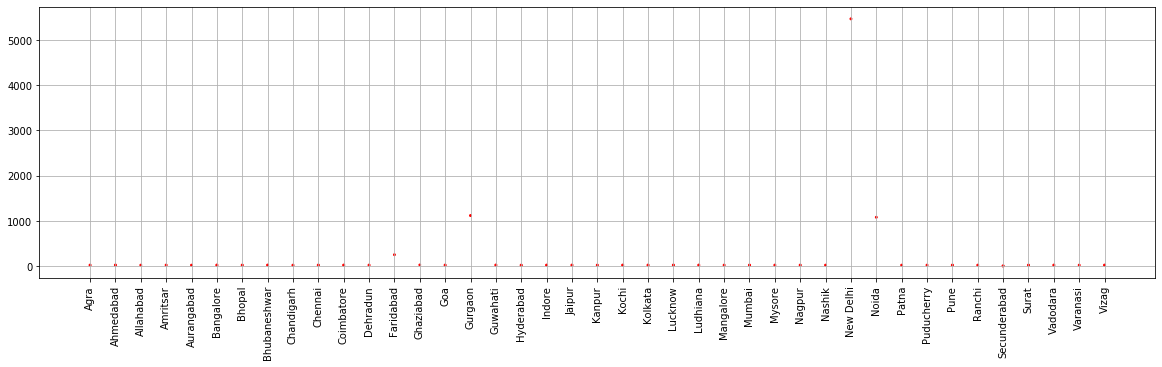

In [15]:
file_data = csv.DictReader(open('F:/datasets/zomato.csv',encoding='latin-1'),skipinitialspace=True)
india_cities_restaurants = {}
for row in file_data:
    #filter to select indian restaurants 
    if int(float(row['Country Code'])) == 1:
        city = row['City']
        if city not in india_cities_restaurants:
                india_cities_restaurants[city] = {'num_restaurant':0,'Votes_and_rating':[],'weighted_rating':0}
        else:
            india_cities_restaurants[city]['num_restaurant'] += 1
            india_cities_restaurants[city]['Votes_and_rating'].append(((float(row['Votes'])),float(row['Aggregate rating'])))       
#For bubble-graph
for i in india_cities_restaurants:
    total_votes = 0
    votes_and_rating = 0
    for j in india_cities_restaurants[i]['Votes_and_rating']:
        votes_and_rating += float(j[0])*j[1]
        total_votes += j[0]                                                                                                                                         
        if total_votes != 0:
           india_cities_restaurants[i]['weighted_rating'] = float(format(votes_and_rating/total_votes,".2f"))
num_rest = []
weighted_rating = []
cities = []
for i in india_cities_restaurants:
    if india_cities_restaurants[i]['weighted_rating'] != 0.0:
        print(i,"has",india_cities_restaurants[i]['num_restaurant'],"restaurants with weighted rating",india_cities_restaurants[i]['weighted_rating'])
        num_rest.append(india_cities_restaurants[i]['num_restaurant'])
        weighted_rating.append(india_cities_restaurants[i]['weighted_rating'])
        cities.append(i)
plt.figure(figsize=(20,5))
plt.scatter(cities,num_rest,s=weighted_rating,c='r',alpha=1)
plt.xticks(rotation = 90)
plt.grid()
plt.show()      